In [72]:
from IPython.display import Image

# Домашнее задание

Дан объект в 2d пространстве:

import numpy as np
import matplotlib.pyplot as plt

A = [ [-100, -100, 1],  
      [-100, 100, 1],   
      [100, 100, 1],   
      [0, 0, 1],  
      [100, -100, 1],  
      [-100, -100, 1] ]  

A = np.array(A)
x = A[:,0]
y = A[:,1]

plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])
При помощи матричных операций выполните:  

* Уменьшить объект в два раза  
* Повернуть на 130 градусов  
* Отразить объект относительно прямой y=x  
* Вычислить определитель композиции преобразований (итоговой матрицы реализующей все три отображения)  


Решите систему уравнений, используя матричный подход  
x + z = 2  
-x + y - 2*z + w = -2  
4*x + z - 2*w = 0  
-4*x + 4*y + w = 5  

In [80]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

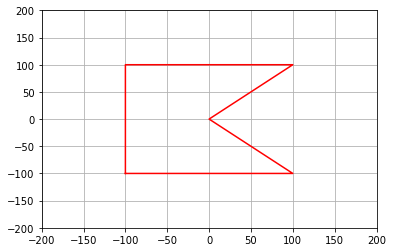

In [35]:
A = [ [-100, -100, 1], [-100, 100, 1], [100, 100, 1], [0, 0, 1], [100, -100, 1], [-100, -100, 1] ]
A = np.array(A)
x = A[:,0]
y = A[:,1]

plt.plot(x, y, color='r')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.grid();

### Уменьшить объект в два раза

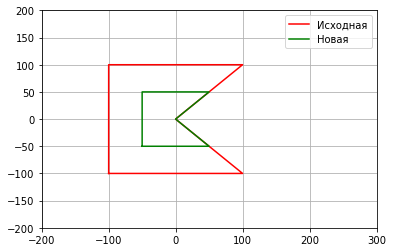

In [62]:
Matrix_transform = np.array([
    [0.5, 0, 0],
    [0, 0.5, 0],
    [0, 0, 1]
])

B = []
for point in A:
    new_point=np.dot(Matrix_transform,np.transpose(point))
    B.append(new_point)
B = np.array(B).astype(int)

x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')

x = B[:,0]
y = B[:,1]
plt.plot(x, y, color='g')

plt.ylim([-200, 200])
plt.xlim([-200, 300])
plt.grid()
plt.legend(['Исходная', 'Новая']);

### Повернуть объект на 130 градусов

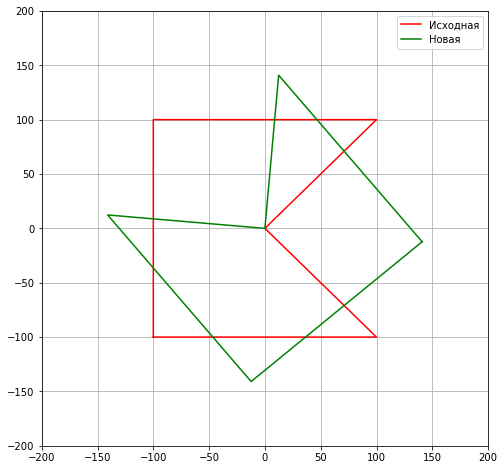

In [50]:
degr = np.radians(130)
turn = np.array([[np.cos(degr),np.sin(degr), 0], [-np.sin(degr),np.cos(degr), 0], [0,0,1]])
C = np.dot(A, turn)

plt.figure(figsize=(8, 8))

x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')

x = C[:,0]
y = C[:,1]
plt.plot(x, y, color='g')

plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.grid()
plt.legend(['Исходная', 'Новая']);

### Отразить объект относительно прямой y=x

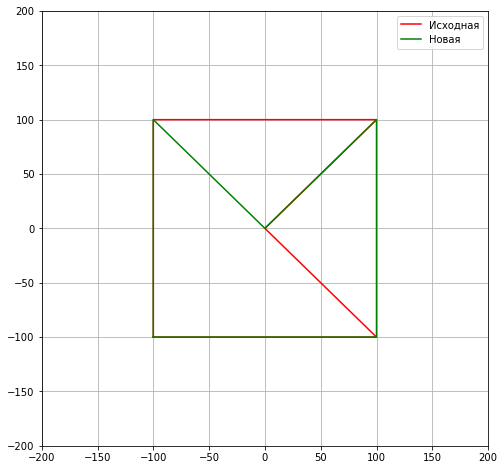

In [51]:
Inv = [[0, 1, 0], [1, 0, 0], [0, 0, 1]]
Inv = np.array(Inv)

Inv_A = A @ Inv

plt.figure(figsize=(8, 8))

x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r') 

x = Inv_A[:,0]
y = Inv_A[:,1]

plt.plot(x, y, color='g')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.grid()
plt.legend(['Исходная', 'Новая']);

 ### Вычислить определитель композиции преобразований (итоговой матрицы реализующей все три отображения)
 
 Выполнение одного или нескольких преобразований - есть композиция преобразования.


[[-50. -50.   1.]
 [-50.  50.   1.]
 [ 50.  50.   1.]
 [  0.   0.   1.]
 [ 50. -50.   1.]
 [-50. -50.   1.]]
[[ 70.44160264  -6.16284167   1.        ]
 [ -6.16284167 -70.44160264   1.        ]
 [-70.44160264   6.16284167   1.        ]
 [  0.           0.           1.        ]
 [  6.16284167  70.44160264   1.        ]
 [ 70.44160264  -6.16284167   1.        ]]
[[ -6.16284167  70.44160264   1.        ]
 [-70.44160264  -6.16284167   1.        ]
 [  6.16284167 -70.44160264   1.        ]
 [  0.           0.           1.        ]
 [ 70.44160264   6.16284167   1.        ]
 [ -6.16284167  70.44160264   1.        ]]


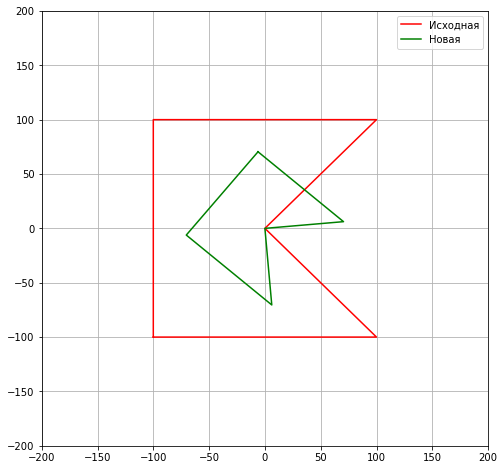

In [66]:
""""Сделаем последовательное преобразование матрицы А, применяя к ней матрицу уменьшения, 
к полученной матрицу матрицу поворота, к полученной матрице матрицу отражения"""

Matrix_1 = A @ Matrix_transform
print(Matrix_1)
print('=====================================================')
Matrix_2 = Matrix_1 @ turn
print(Matrix_2)
print('=====================================================')
Finish_matrix_1 = Matrix_2 @ Inv
print(Finish_matrix_1)
print('=====================================================')


plt.figure(figsize=(8, 8))

x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r') 

x = Finish_matrix_1[:,0]
y = Finish_matrix_1[:,1]

plt.plot(x, y, color='g')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.grid()
plt.legend(['Исходная', 'Новая']);

[[ 0.38302222 -0.3213938   0.        ]
 [-0.3213938  -0.38302222  0.        ]
 [ 0.          0.          1.        ]]
[[ -6.16284167  70.44160264   1.        ]
 [-70.44160264  -6.16284167   1.        ]
 [  6.16284167 -70.44160264   1.        ]
 [  0.           0.           1.        ]
 [ 70.44160264   6.16284167   1.        ]
 [ -6.16284167  70.44160264   1.        ]]


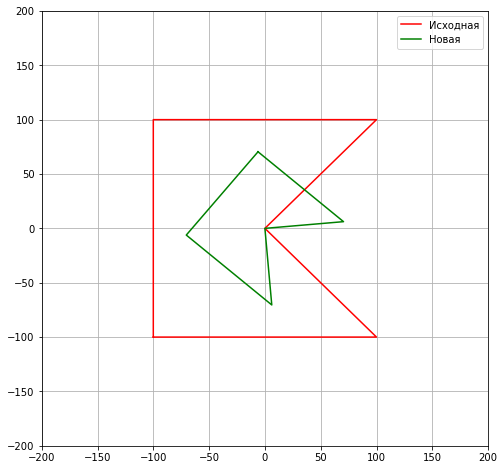

In [67]:
"""Найдем матрицу композиции преобразований и применим ее к исходной матрице А"""

Final_transform_matrix = Matrix_transform @ turn @ Inv
print(Final_transform_matrix)
print('=====================================================')
Finish_matrix_2 = A @ Final_transform_matrix
print(Finish_matrix_2)
print('=====================================================')

plt.figure(figsize=(8, 8))

x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r') 

x = Finish_matrix_2[:,0]
y = Finish_matrix_2[:,1]

plt.plot(x, y, color='g')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.grid()
plt.legend(['Исходная', 'Новая']);

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]


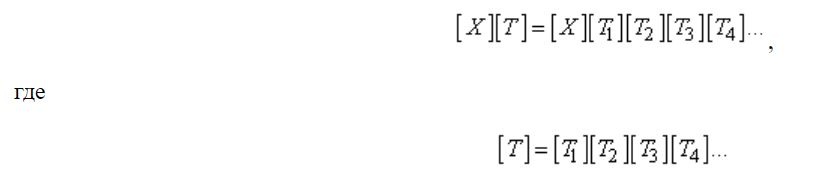

In [75]:
"""Мы получили одинковый результат, из которого следует равенство указанное ниже истинно"""

print(A @ Final_transform_matrix == A @ Matrix_transform @ turn @ Inv)

Image("C:\Мои занятия\Нетология\Математика для DS(18)\Лекция 3\Композиция преобразований.JPG")

In [78]:
print(f'Определитель композиции преобразований равен {np.linalg.det(Final_transform_matrix)} .')

Определитель композиции преобразований равен -0.25000000000000006 .


### Решим систему уравнений данную нам заданием 

x + z = 2    
-x + y - 2z + w = -2    
4x + z - 2w = 0    
-4x + 4y + w = 5    

In [79]:
a = np.array([[1, 1, 0, 0], [-1, 1, -2, 1], [4, 0, 1, -2], [-4, 4, 0, 1]])
b = np.array([2, -2, 0, 5])

In [81]:
# решение 1
linalg.solve(a, b)

array([0.72222222, 1.27777778, 2.66666667, 2.77777778])

In [82]:
np.dot(a, b)

array([  0,   1,  -2, -11])

In [83]:
# решение 2
from scipy.linalg import solve

solve(a, b)

array([0.72222222, 1.27777778, 2.66666667, 2.77777778])

In [84]:
print(np.allclose(np.dot(a, linalg.solve(a, b)), b))
print(np.allclose(np.dot(a, solve(a, b)), b))

True
True
